In [20]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 22 12:39:47 2019

@author: HP
"""

#!/usr/bin/env python
# coding: utf-8

# In[1]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
#readig data via read_csv
dataset = pd.read_csv('exams.csv') #loading data to dataset variable

In [22]:
X1 = dataset['exam_1']
X2 = dataset['exam_2']
y = dataset['admitted'].values

Text(0,0.5,'Second_exam_result')

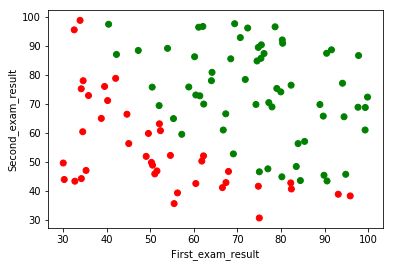

In [23]:
plt.figure()
spe_color = np.where( y, 'green', 'red') #based on passing exam result variables was colored red and green
plt.scatter(X1,X2, c = spe_color) #failed strudents are red and passed students are green
plt.xlabel('First_exam_result')
plt.ylabel('Second_exam_result')

In [24]:
#normalizing data
X1 = (X1 - X1.mean()) / X1.std()
X2 = (X2 - X2.mean()) / X2.std()
X = dataset[['exam_1', 'exam_2']].values

In [25]:
#save data for future testing
X_s = X

In [26]:
#sigmoid function from scratch 
def sigmoid_function(z):
    sig = 1 / (1 + np.exp(-1 * z))
    return sig

In [27]:
#implementing logistic cost function via sigmoid function and gradient descent
def logistic_cost_function(theta, X, y):
    m = len(y)
    h_theta = sigmoid_function(X.dot(theta)) #compute h_theta(x) = sigmoid(theta^T * x)  
    J = (-1/m) * np.sum((y * np.log(h_theta))  + ((1-y) * np.log(1 - h_theta)))
    G = 1/m * (X.T.dot(h_theta - y))
    return J, G

In [28]:
#scaling feature (normalization)
X = (X - X.mean()) / X.std()


In [29]:
m = dataset.shape[0] #number of rows
y = y.reshape(m,1) #ndarray
bais = np.ones((m,1)) 
X = np.append(bais,X,axis=1)
theta = np.zeros((3,1))
J, G = logistic_cost_function(theta,X,y)

In [30]:
alpha = 0.001 #learning rate
iters = 100000 # No of iterations


In [31]:
# j_h means cost history array for each iteration
def logistic_gradient_descent(X, y, theta, alpha, iters):
    J_h = [0] * iters  
    
    for i in range(iters):
        #hypothesis    
            J, G = logistic_cost_function(theta, X, y)
            theta = theta - alpha * G
            J_h[i] = J   #Save the cost J in every iteration 
            if i % 10000 == 0:
                J, G = logistic_cost_function(theta,X,y)
                print("iteration: #%d" % i , 'is', J)
                 
    return theta, J_h

In [32]:
#N_T theta after implemeting logistic gradient descent
N_T, J_h = logistic_gradient_descent(X, y, theta, alpha, iters)


iteration: #0 is 0.6929945332270634
iteration: #10000 is 0.3117201270367365
iteration: #20000 is 0.262449819577935
iteration: #30000 is 0.2423642262854264
iteration: #40000 is 0.23136820122614832
iteration: #50000 is 0.22446651041650853
iteration: #60000 is 0.21977683400396467
iteration: #70000 is 0.21642019913607763
iteration: #80000 is 0.21392782048205874
iteration: #90000 is 0.21202588533782066


Text(0.5,1,'Costs iters ')

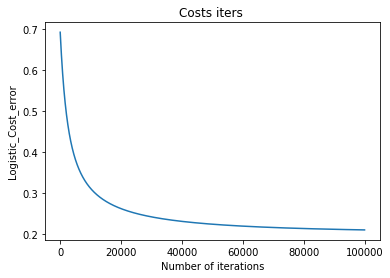

In [33]:
#plotting decreasing cost at each iterations
plt.figure()
plt.plot(J_h)
plt.xlabel('Number of iterations')
plt.ylabel('Logistic_Cost_error')
plt.title("Costs iters ")

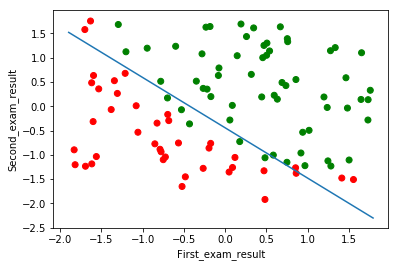

In [34]:
#visualisation for decision boundary in liner, prediction linear regression with logistic 
#labeling and scattering first and second exam results based on admitted or not admitted exams

plt.figure()
plt.scatter(X1,X2, c = spe_color)
plt.xlabel('First_exam_result')
plt.ylabel('Second_exam_result') 
X_min = np.min(X) #min of X
X_max = np.max(X) #max of Xa
X_points = np.array([X_min, X_max]) #X main points min and max in array
y_points = -(N_T[1] * X_points + N_T[0])/ N_T[2] #line from min to max  
plt.plot( X_points, y_points) #plotting

In [35]:
#prediction of Train accuracy with used train model without accuracy_score function 
pred = X.dot(N_T) > 0
accuracy = sum(pred==y)[0]
print('Accuracy of Train:', accuracy,'%')



Accuracy of Train: 89 %


In [36]:
#finding accuracy with sklearn library
from sklearn.metrics import accuracy_score
pred = pred = X.dot(N_T)
dataset['pred'] = sigmoid_function(pred)
dataset['admit or not'] = np.round(dataset['pred'])
accuracy = accuracy_score(dataset['admitted'], dataset['admit or not']) * 100
print('Accuracy of Train:', accuracy, '%')

Accuracy of Train: 89.0 %


In [37]:
#Testing first prediction based on exam_1 and exam_2 result
exam_1 = 55
exam_2 = 70
admit = 1

X_t = np.array([exam_1, exam_2])
X_t = (X_t - X_s.mean())/X_s.std()
X_t = np.append(np.ones(1),X_t)
prob = sigmoid_function(X_t.dot(N_T))

print('prediction:', prob, '%')
result = np.round(prob)  

if(result == 1):
    print('Result: Admitted', result )
else:
    print('Result: Not Admitted', result)

prediction: [0.54178921] %
Result: Admitted [1.]


In [38]:
exam_1 = 40
exam_2 = 60
admit = 0  

X_t = np.array([exam_1, exam_2])
X_t = (X_t - X_s.mean())/X_s.std()
X_t = np.append(np.ones(1),X_t)
prob = sigmoid_function(X_t.dot(N_T))

print('prediction:', prob, '%')
result = np.round(prob)  

if(result == 1):
    print('Result: Admitted', result )
else:
    print('Result: Not Admitted', result)

prediction: [0.02379013] %
Result: Not Admitted [0.]


In [39]:
#Logistic Regression with regularization
from sklearn.linear_model import LogisticRegression
dataset = pd.read_csv('exams.csv', ',') #loading data to dataset variable
LR = LogisticRegression(penalty='l2', C=1)  
LR.fit(X_s,y)
ac =LR.score(X_s,y) * 100
print(ac,'%')

87.0 %


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#testing
X_t = np.array([[55,70],[40,60]])
X_prob = LR.predict_proba(X_t)
X_pred = LR.predict(X_t)


In [41]:
#demonstrating result
pro1 = X_prob[1:2,0:1]
pre1 = X_pred[0]

print('prediction:', pro1, '%')

if(pre1 == 1):
    print('Result: Admitted', pre1 )
else:
    print('Result: Not Admitted', pre1)


prediction: [[0.62266437]] %
Result: Admitted 1


In [42]:

pro2 = X_prob[1:2,1:2]
pre2 = X_pred[1]
print('prediction:', pro2, '%')

if(pre1 == 1):
    print('Result: Admitted', pre2 )
else:
    print('Result: Not Admitted', pre2)

prediction: [[0.37733563]] %
Result: Admitted 0


In [43]:
#overall visualization
X_res = np.array([[55,70,1,pro1,pre1],[40,60,0,pro2,pre2]])
print(X_res)

[[55.         70.          1.          0.62266437  1.        ]
 [40.         60.          0.          0.37733563  0.        ]]
